#### Used Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import VarianceRatio
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.tsa.arima.model as arima_model
import statsmodels.api as sm
import warnings # this was used to filter warning in my code
warnings.filterwarnings('ignore')

## Task 1

The first activity asked to load the data into my computer and to produce a graphic showing the time series of the wind generation over time and show if there is evidence of annual seasonality.

#### i. Reading the given csv file

In [2]:
# loading a csv file into a dataframe and checking the length of the dataframe
wind_gen=pd.read_csv('WindGeneration.csv')
len(wind_gen)

8760

#### ii. Checking for missing data

In [3]:
# Checking if there exist some missing data in our dataframe
wind_gen.isnull().sum()

Date               0
Time               0
Wind Generation    1
dtype: int64

In [4]:
# checking the unique values in the column called Time
wind_gen['Time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

#### iii.Filling the missing value

In [5]:
# filling the missing value using interpolation method
wind_gen=wind_gen.interpolate()

In [6]:
wind_gen.isnull().sum()

Date               0
Time               0
Wind Generation    0
dtype: int64

#### iii. Creation of a timestamps

In [7]:
# Organisind the date in a preferred format  
wind_gen['Date']=pd.to_datetime(wind_gen['Date'],dayfirst=True)
wind_gen.tail()

,Date,Time,Wind Generation
8755,2014-12-31,20,996.8
8756,2014-12-31,21,1031.8
8757,2014-12-31,22,1218.0
8758,2014-12-31,23,1312.1
8759,2014-12-31,24,1424.8


In [8]:
# Changing the time format into a preferred format
wind_gen['Time']=pd.to_timedelta(wind_gen['Time'],unit='hour')
wind_gen.tail()

,Date,Time,Wind Generation
8755,2014-12-31,0 days 20:00:00,996.8
8756,2014-12-31,0 days 21:00:00,1031.8
8757,2014-12-31,0 days 22:00:00,1218.0
8758,2014-12-31,0 days 23:00:00,1312.1
8759,2014-12-31,1 days 00:00:00,1424.8


In [9]:
wind_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Date             8760 non-null   datetime64[ns] 
 1   Time             8760 non-null   timedelta64[ns]
 2   Wind Generation  8760 non-null   float64        
dtypes: datetime64[ns](1), float64(1), timedelta64[ns](1)
memory usage: 205.4 KB


In [10]:
# Creating a timestamp by combining the dates and their respective time
wind_gen['Date']=wind_gen['Date'] + wind_gen['Time']
wind_gen.tail()

,Date,Time,Wind Generation
8755,2014-12-31 20:00:00,0 days 20:00:00,996.8
8756,2014-12-31 21:00:00,0 days 21:00:00,1031.8
8757,2014-12-31 22:00:00,0 days 22:00:00,1218.0
8758,2014-12-31 23:00:00,0 days 23:00:00,1312.1
8759,2015-01-01 00:00:00,1 days 00:00:00,1424.8


In [11]:
wind_gen=wind_gen[['Date', 'Wind Generation']]
np.asarray(wind_gen)

array([[Timestamp('2014-01-01 01:00:00'), 1190.1],
       [Timestamp('2014-01-01 02:00:00'), 1186.6],
       [Timestamp('2014-01-01 03:00:00'), 1174.3],
       ...,
       [Timestamp('2014-12-31 22:00:00'), 1218.0],
       [Timestamp('2014-12-31 23:00:00'), 1312.1],
       [Timestamp('2015-01-01 00:00:00'), 1424.8]], dtype=object)

In [12]:
wind_gen=wind_gen.set_index('Date')

#### iv. Plotting  the time series of the wind generation over time

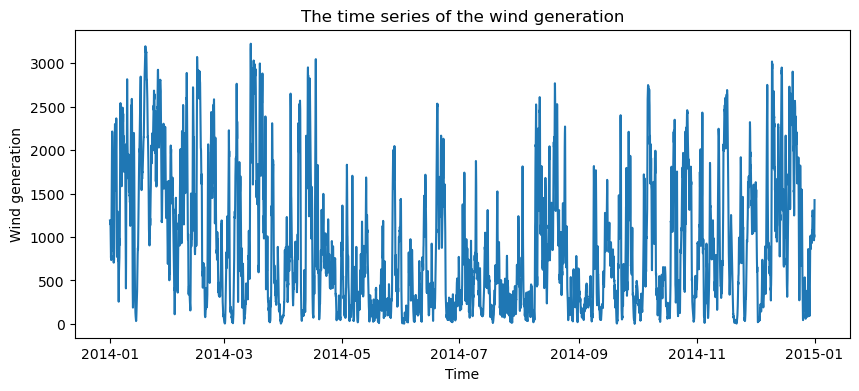

In [13]:
# Plotting the time series graph of the wind generation
plt.figure(figsize=(10,4),dpi=100)
plt.plot(wind_gen['Wind Generation']);
plt.xlabel('Time');
plt.ylabel('Wind generation');
plt.title('The time series of the wind generation');
plt.savefig("GenerationVstime.png")

#### v. checking the intra-anual seasonality

In [14]:
# Here I resampled the time series on a preferred format(daily,weekly,monthly,quarterly) 
df=wind_gen
daily_resampled_data = df['Wind Generation'].resample('D').mean()
weekly_resampled_data = df['Wind Generation'].resample('W').mean()
monthly_resampled_data = df['Wind Generation'].resample('M').mean()
Quarterly_resampled_data = df['Wind Generation'].resample('Q').mean()

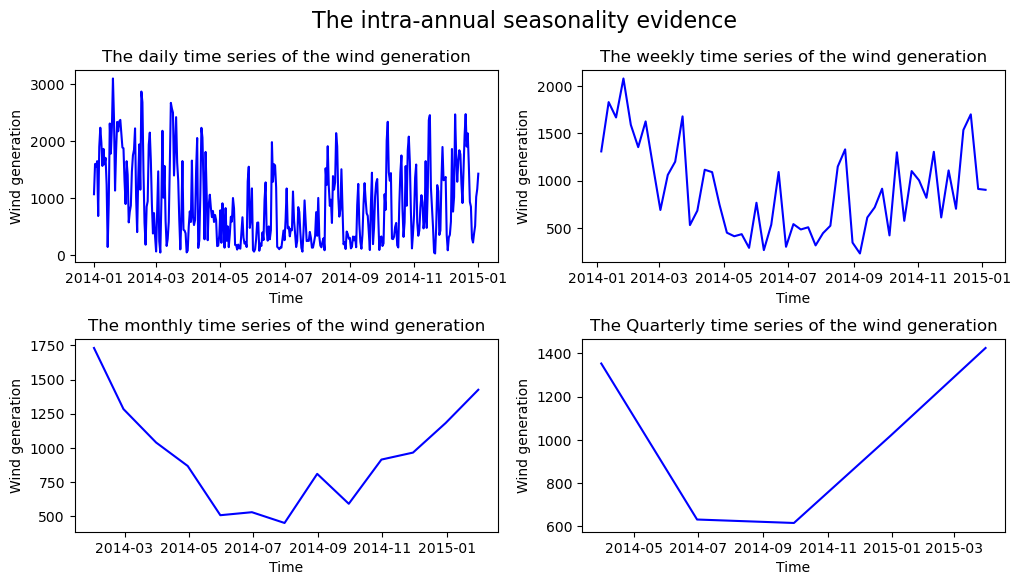

In [15]:
# Here I plotted the intra seasonality 
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,6))

axes[0][0].plot(daily_resampled_data,color='blue')
axes[0][0].set_xlabel('Time');
axes[0][0].set_ylabel('Wind generation');
axes[0][0].set_title('The daily time series of the wind generation')

axes[0][1].plot(weekly_resampled_data,color='blue')
axes[0][1].set_xlabel('Time');
axes[0][1].set_ylabel('Wind generation');
axes[0][1].set_title('The weekly time series of the wind generation')

axes[1][0].plot(monthly_resampled_data,color='blue');
axes[1][0].set_xlabel('Time');
axes[1][0].set_ylabel('Wind generation');
axes[1][0].set_title('The monthly time series of the wind generation')

axes[1][1].plot(Quarterly_resampled_data,color='blue');
axes[1][1].set_xlabel('Time');
axes[1][1].set_ylabel('Wind generation');
axes[1][1].set_title('The Quarterly time series of the wind generation')

fig.suptitle("The intra-annual seasonality evidence",fontsize=16);
fig.subplots_adjust(left=None, bottom=None,right=None, top=None, hspace=0.4)
plt.savefig("intra_seasons_GenerationVstime.png")

## Task 2

The task here was to plot the change in wind generation over time as a percentage of the maximum generation and show whether or not there was evidence of annual seasonality.

In [16]:
# Checking the columns in our dataframe
wind_gen=wind_gen.reset_index()
wind_gen.columns

Index(['Date', 'Wind Generation'], dtype='object')

In [17]:
wind_gen.head()

,Date,Wind Generation
0,2014-01-01 01:00:00,1190.1
1,2014-01-01 02:00:00,1186.6
2,2014-01-01 03:00:00,1174.3
3,2014-01-01 04:00:00,1146.7
4,2014-01-01 05:00:00,1156.8


#### i. Calculating the percentage of the change in generation

In [18]:
# Transforming wind generation column into an array
X_t=[0]
X_t=np.array(X_t)
X_t=np.concatenate((X_t,wind_gen['Wind Generation'].values))
max_gen=wind_gen['Wind Generation'].max()

In [19]:
# a loop that calculate the percentage 
percentage= []
for i in range(1,len(X_t)):
           percent=(X_t[i] - X_t[i-1])*100 /max_gen
           percentage.append(percent)
len(percentage)

8760

In [20]:
# Inserting the obtained percentage values in our dataframe
wind_gen['percent_gen']=percentage
wind_gen.isnull().sum()

Date               0
Wind Generation    0
percent_gen        0
dtype: int64

In [21]:
wind_gen[7150:7160]

,Date,Wind Generation,percent_gen
7150,2014-10-25 23:00:00,906.3,2.300490
7151,2014-10-26 00:00:00,973.5,2.083463
7152,2014-10-26 01:00:00,1042.6,2.142370
7153,2014-10-26 02:00:00,1063.2,0.638680
7154,2014-10-26 03:00:00,2214.8,35.704099
7155,2014-10-26 04:00:00,1146.2,-33.130774
7156,2014-10-26 05:00:00,1253.4,3.323619
7157,2014-10-26 06:00:00,1310.8,1.779624
7158,2014-10-26 07:00:00,1470.0,4.935822
7159,2014-10-26 08:00:00,1518.3,1.497489


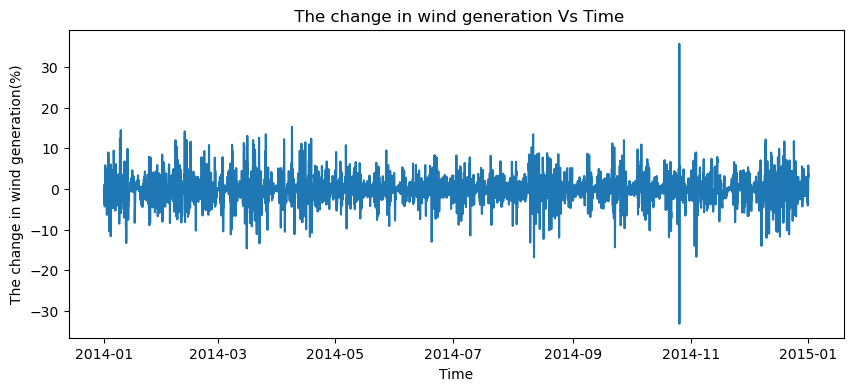

In [22]:
# plotting the change in generation versus the time 
plt.figure(figsize=(10,4),dpi=100)
plt.plot(wind_gen['Date'][1:],wind_gen['percent_gen'][1:]);
plt.ylabel('The change in wind generation(%)');
plt.xlabel('Time');
plt.title(' The change in wind generation Vs Time');
plt.savefig("Change_GenerationVstime.png")

#### iii.  checking the intra-anual seasonality

In [23]:
# Here I resampled the given time series into the one i prefer
df_change=wind_gen.set_index('Date')
change_daily_resampled_data = df_change['percent_gen'][1:].resample('D').mean()
change_weekly_resampled_data = df_change['percent_gen'][1:].resample('W').mean()
change_monthly_resampled_data = df_change['percent_gen'][1:].resample('M').mean()
change_Quarterly_resampled_data = df_change['percent_gen'][1:].resample('Q').mean()

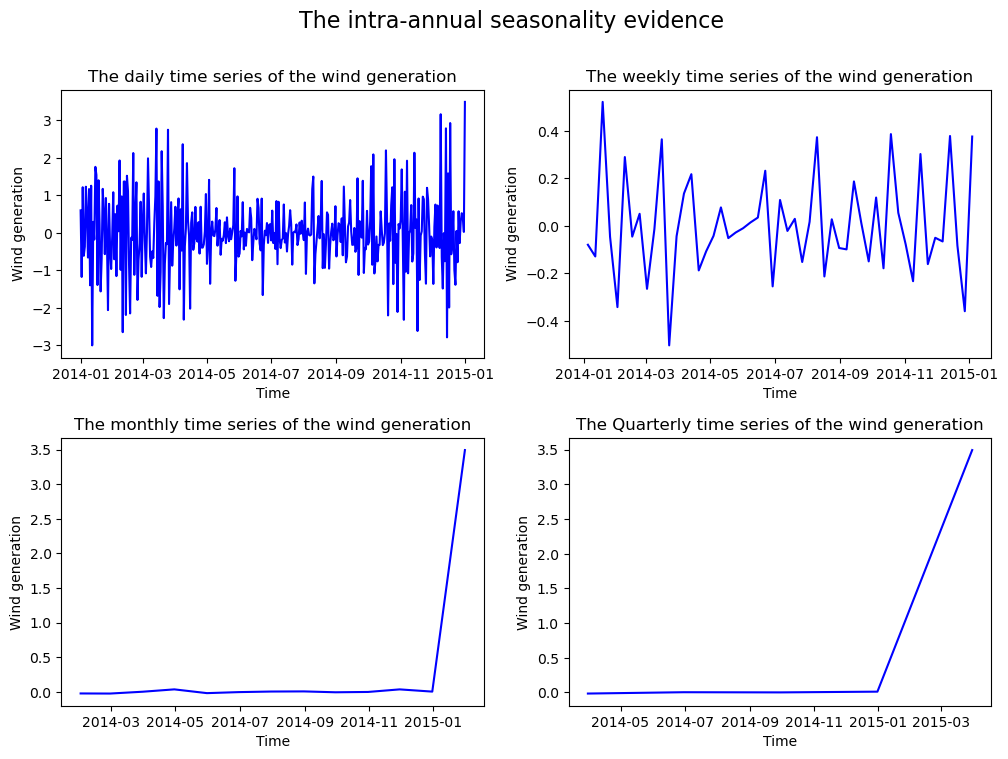

In [24]:
# Here I plotted the intra seasonality 
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))

axes[0][0].plot(change_daily_resampled_data,color='blue')
axes[0][0].set_xlabel('Time');
axes[0][0].set_ylabel('Wind generation');
axes[0][0].set_title('The daily time series of the wind generation')


axes[0][1].plot(change_weekly_resampled_data,color='blue')
axes[0][1].set_xlabel('Time');
axes[0][1].set_ylabel('Wind generation');
axes[0][1].set_title('The weekly time series of the wind generation')

axes[1][0].plot(change_monthly_resampled_data,color='blue');
axes[1][0].set_xlabel('Time');
axes[1][0].set_ylabel('Wind generation');
axes[1][0].set_title('The monthly time series of the wind generation')

axes[1][1].plot(change_Quarterly_resampled_data,color='blue');
axes[1][1].set_xlabel('Time');
axes[1][1].set_ylabel('Wind generation');
axes[1][1].set_title('The Quarterly time series of the wind generation')

fig.suptitle("The intra-annual seasonality evidence",fontsize=16);
fig.subplots_adjust(left=None, bottom=None,right=None, top=None, hspace=0.3)
plt.savefig("intra2_seasons_GenerationVstime.png")

## 3. Task 3

The task here was to consider positive and negative ramps in wind power generation, x(t), as a percentage of the maximum, over the hourly timescale. An hourly ramp would therefore defined as r(t,d)=100*[x(t+d)-x(t)]/max(x) where d=1 for an hourly sampling period. we were aked to construct an empirical cumulative distribution functions (CDF) for both the positive and negative ramps and to plot these with the probability on a vertical logarithmic axis as well as to plot the CDF for a normal distribution with mean-zero and standard deviation from the observations. in addition, we had to see If the normal distribution was a good model for wind power extremes or not

In [25]:
x_t=wind_gen['Wind Generation']

#### i. Calculating the ramps

In [26]:
# a loop that calculate the percentage 
ramps= []
for i in range(1,len(x_t)):
           percent=(x_t[i] - x_t[i-1])*100 /max_gen
           ramps.append(percent)

#### ii. Separating the positive and negative ramps 

In [27]:
positive_values=[]
negative_values=[]
for number in ramps:
    if number < 0:
        negative_values.append(abs(number))   
    else:
        positive_values.append(number)    

In [28]:
 # combining the positive values and the negative values into the same list
ramps= np.concatenate((negative_values,positive_values))
ramps=pd.DataFrame(ramps)

In [29]:
# finding both the mean and standard deviation of the ramps
mean = 0
std = np.std(negative_values)

#### iii. Sorting the positive and negative ramps

In [30]:
# Sorting both the positive and negative ramps independently
sorted_positive_ramps = np.sort(positive_values)
sorted_negative_ramps = np.sort(negative_values)

In [31]:
# Generating random values 
x=np.linspace(0,30,31)

#### iv. Semilogy plot of the ramps

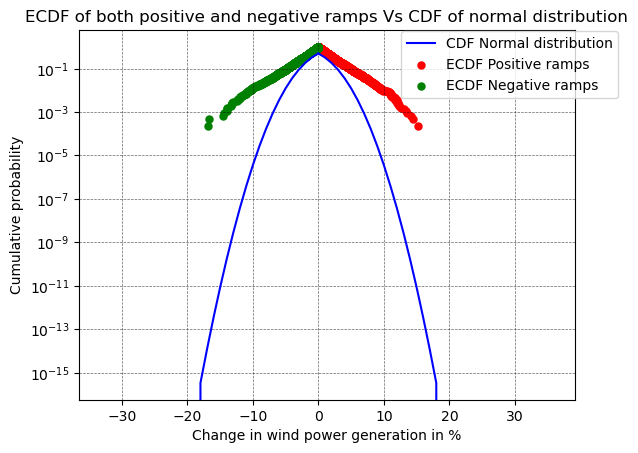

In [32]:
plt.figure(dpi=100)
plt.plot(x,1-norm.cdf(x,0,std),color='blue',label='CDF Normal distribution');
plt.plot(-x,1-norm.cdf(x,0,std),color='blue')
plt.scatter(ECDF(sorted_positive_ramps).x,1-ECDF(sorted_positive_ramps).y,label='ECDF Positive ramps',color='red',linewidths=0.05);
plt.scatter(-ECDF(sorted_negative_ramps).x,1-ECDF(sorted_negative_ramps).y,label='ECDF Negative ramps',color='green', linewidths=0.05);
plt.xlabel('Change in wind power generation in %');
plt.yscale('log')
plt.ylabel('Cumulative probability');
plt.title('ECDF of both positive and negative ramps Vs CDF of normal distribution');
plt.legend(loc=(0.65,0.815))
plt.grid(color='black', alpha=0.6, linestyle='dashed', linewidth=0.5);
plt.savefig("RampsVsnormal_distribution.png")

## Task 4

the task was to Investigate variability over timescales from one hour to one day by plotting the 1%, 5%, 95% and 99% percentiles. This can be achieved using distributions of the ramps r(t,d) with d =1,2,…,24.

In [33]:
x_t=wind_gen['Wind Generation']

In [34]:
# a function that helps to find the ramps by insertind a preferred timescale d
def ramps_values(d):
    ramps_2=[]
    for k in range(d,len(x_t)):
           percent=(x_t[k] - x_t[k-d])*100 /max_gen
           ramps_2.append(percent)
    return ramps_2

In [35]:
# This is where i computed one percent of each ramps time scale
hours = np.arange(1, 25)
one_percent = []
index = 0

while index < len(hours):
    d = hours[index]
    percent = np.percentile(ramps_values(d), 1)
    one_percent.append(percent)
    index += 1

len(one_percent)

24

In [36]:
# this where i computed five percent of  each ramps timescale
five_percent = []
index = 0

while index < len(hours):
    d = hours[index]
    percent = np.percentile(ramps_values(d), 5)
    five_percent.append(percent)
    index += 1

len(five_percent)

24

In [37]:
# this where i computed ninety five percent of each ramps timescale
hours = np.arange(1,25)
ninetyfive_percent = []
counter = 0
while counter < len(hours):
    percent = np.percentile(ramps_values(hours[counter]), 95)
    ninetyfive_percent.append(percent)
    counter += 1
len(ninetyfive_percent)

24

In [38]:
# this where i computed ninety nine percent of each ramps timescale
ninetynine_percent=[]
index = 0
while index < len(hours):
    d = hours[index]
    percent = np.percentile(ramps_values(d), 99)
    ninetynine_percent.append(percent)
    index += 1

len(ninetynine_percent)

24

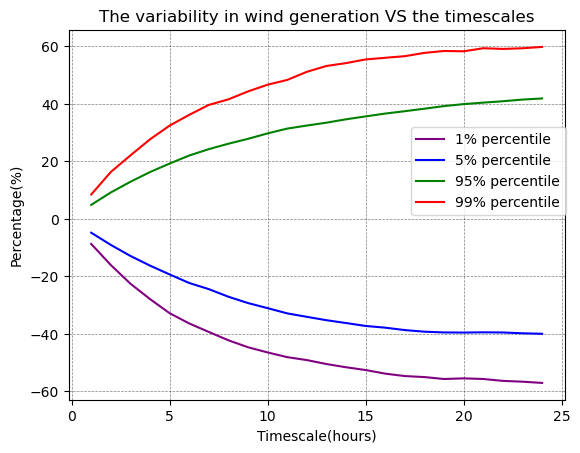

In [39]:
# Here I computed a graphical representation of all resulted percentiles
plt.plot(hours,one_percent,label='1% percentile',color='purple');
plt.plot(hours,five_percent,label='5% percentile',color='blue');
plt.plot(hours,ninetyfive_percent,label='95% percentile',color='green');
plt.plot(hours,ninetynine_percent,label='99% percentile',color='red');
plt.xlabel('Timescale(hours)');
plt.ylabel('Percentage(%)');
plt.title('The variability in wind generation VS the timescales');
plt.grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5);
plt.legend(loc=(0.69,0.5));
plt.savefig("percentiles.png")

## Task 5

The goal here was to calculate and plot the autocorrelation of wind generation for lags over 10 days as well as to comment on the structure of the autocorrelation.

In [40]:
# Calculaton of the autocorrelation
auto_correlation=wind_gen['Wind Generation'].autocorr(lag=240)
auto_correlation

0.15740697379208

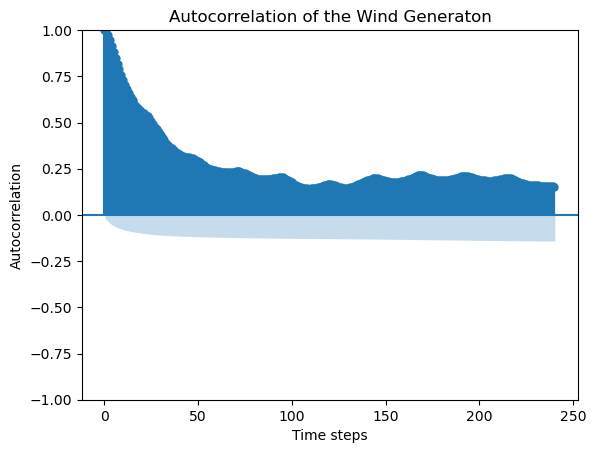

In [41]:
# Visualasing the autocorrelation of wind generation
days=np.arange(1,365)
plot_acf(wind_gen['Wind Generation'],lags=240);
plt.xlabel('Time steps')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the Wind Generaton')
plt.savefig("autocorr_1.png")


## Task 6

The primary objective in this section was to determine the autocorrelation of the changes in wind generation for lags exceeding 10 days and to create a visual representation of the results through a plot. The plot was also designed to include horizontal lines to identify any statistically significant values (p<0.05). Furthermore, the following questions were addressed:
(a) Is there any indication of a daily seasonal pattern in the data?
(b) Would it be more advantageous to model the changes in wind generation rather than the wind generation itself?

In [42]:
# Calculating the change in wind generation 
def change_wind(d):
    ramps_2=[]
    for k in range(d,len(x_t)):
           percent=(x_t[k] - x_t[k-d])*100 /max_gen
           ramps_2.append(percent)
    return ramps_2

In [43]:
# The change in wind generation
change_wind_gen=change_wind(1)
p=0.05
line=np.linspace(1,len(change_wind_gen),len(change_wind_gen))

In [44]:
# calculating the critical value from the normal distribution
y=1.96/(len(wind_gen['Wind Generation']))**0.5
y1=-1.96/(len(wind_gen['Wind Generation']))**0.5

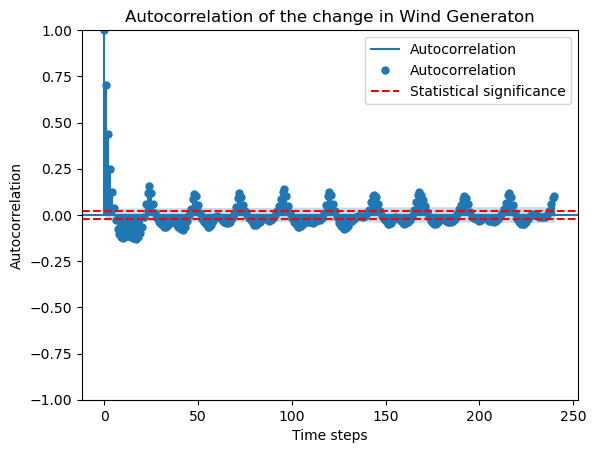

In [45]:
# Visualizing the autocorrelation of the changes in wind generation
plot_acf(change_wind_gen[1:],lags=240,alpha=0.05,label='Autocorrelation');
plt.axhline(y, color='r',linestyle='--',label='Statistical significance');
plt.axhline(y1, color='r',linestyle='--');
plt.xlabel('Time steps')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the change in Wind Generaton')
plt.legend();
plt.savefig("autocorr_2.png");

## Task 7

The question asked to use a variance ratio test to investigate the structure of the wind generation time series and to see if I  the null hypothesis of a random walk can be rejected. To also identity if there is evidence of either mean-reversion or
mean-aversion.

In [46]:
# Here I computed the variance test ratio using the Adfuller test
variance_r= adfuller(wind_gen['Wind Generation'],240)
variance_r

(-5.132624008595448,
 1.2049005632425429e-05,
 128,
 8631,
 {'1%': -3.4311078781040734,
  '5%': -2.861874931189293,
  '10%': -2.56694827893115},
 95765.04197741301)

In [47]:
# Here I computed the variance test ratio using the Arch library
variance_r1 = VarianceRatio(wind_gen['Wind Generation'],240)
print(variance_r1)

     Variance-Ratio Test Results     
Test Statistic                 -2.558
P-value                         0.011
Lags                              240
-------------------------------------

Computed with overlapping blocks (de-biased)


In [48]:
variance_r1.alternative_hypothesis

'The process is not a random walk.'

## Task 8

Estimate the optimal window for a simple moving average. Is there a simple benchmark that improves on the persistence benchmark?

#### i. calculation the simple moving average (SMA)

In [49]:
# Window size declaration
n_values=[]
wind_gen_with_SMA=wind_gen[['Date', 'Wind Generation']]
for numbers in range(1,25):
    n_values.append(numbers)

In [50]:
# A function that calculate a simple moving average
def SMA_calculation(wind_gen_with_SMA, n_values):
    i = 0
    while i < len(n_values):
        n = n_values[i]
        column_name = 'SMA_' + str(n)
        wind_gen_with_SMA[column_name] = wind_gen_with_SMA['Wind Generation'].rolling(n).mean()
        i += 1
    return wind_gen_with_SMA

In [51]:
wind_gen_with_SMA = SMA_calculation(wind_gen_with_SMA, n_values)


In [52]:
wind_gen_with_SMA.head()

,Date,Wind Generation,SMA_1,SMA_2,SMA_3,SMA_4,SMA_5,SMA_6,SMA_7,SMA_8,...,SMA_15,SMA_16,SMA_17,SMA_18,SMA_19,SMA_20,SMA_21,SMA_22,SMA_23,SMA_24
0,2014-01-01 01:00:00,1190.1,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01 02:00:00,1186.6,1186.6,1188.35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01 03:00:00,1174.3,1174.3,1180.45,1183.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01 04:00:00,1146.7,1146.7,1160.50,1169.200000,1174.425,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-01 05:00:00,1156.8,1156.8,1151.75,1159.266667,1166.100,1170.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ii. Calculate the mean absolute error(MEA)

In [53]:
# A function that calculate The mean absolute error
def MAE_calculation(wind_gen_with_SMA, n_values):
    MAE=[]
    for n in n_values:
        column_name = 'SMA_' + str(n)
        wind_gen_with_SMA[column_name] = wind_gen_with_SMA['Wind Generation'].rolling(n).mean()
        wind_gen_with_SMA.dropna(inplace=True)
        error_column_name=mae(wind_gen_with_SMA['Wind Generation'],wind_gen_with_SMA[column_name])
        MAE.append(error_column_name)
    return MAE

In [54]:
MAE=MAE_calculation(wind_gen_with_SMA, n_values)
print("The MAE is:",MAE)

The MAE is: [0.0, 33.244036172161174, 62.57552858560416, 88.94945309815598, 112.94273175203391, 134.76543606206528, 154.71151576738998, 173.3698171431852, 190.34587467596316, 205.765135757018, 219.9302632405604, 232.69936185753278, 245.17162667566873, 256.54621707808735, 266.7341983317887, 276.1773840953929, 285.1359294746849, 293.87250181215705, 301.83270825909045, 307.79593658593654, 314.07679136859383, 320.1268302588547, 325.07480935981795, 328.54370050821416]


## Task 9

The goal is toe Evaluate the mean-Absolute-error (MAE) performance of the persistence benchmark forecast over forecast horizons from one hour to one day as well as to visualize MAE as a percentage of the maximum generation for the persistence benchmark.


#### i. Calculating the persistence 

In [55]:
# Declaration for each forecast horizon
wind_gen_predicted=wind_gen[['Date', 'Wind Generation']]
def Prediction_calculation(wind_gen_predicted, n_values):
    for n in n_values:
        column_name = 'Wind Generation Prediction_' + str(n)
        wind_gen_predicted[column_name] = wind_gen_predicted['Wind Generation'].shift(n)
    return wind_gen_predicted

In [56]:
wind_gen_predicted=Prediction_calculation(wind_gen_predicted, n_values)
wind_gen_predicted.head(25)

,Date,Wind Generation,Wind Generation Prediction_1,Wind Generation Prediction_2,Wind Generation Prediction_3,Wind Generation Prediction_4,Wind Generation Prediction_5,Wind Generation Prediction_6,Wind Generation Prediction_7,Wind Generation Prediction_8,...,Wind Generation Prediction_15,Wind Generation Prediction_16,Wind Generation Prediction_17,Wind Generation Prediction_18,Wind Generation Prediction_19,Wind Generation Prediction_20,Wind Generation Prediction_21,Wind Generation Prediction_22,Wind Generation Prediction_23,Wind Generation Prediction_24
0,2014-01-01 01:00:00,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01 02:00:00,1186.6,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01 03:00:00,1174.3,1186.6,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01 04:00:00,1146.7,1174.3,1186.6,1190.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-01 05:00:00,1156.8,1146.7,1174.3,1186.6,1190.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-01 06:00:00,1189.7,1156.8,1146.7,1174.3,1186.6,1190.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-01 07:00:00,1175.4,1189.7,1156.8,1146.7,1174.3,1186.6,1190.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-01 08:00:00,1089.8,1175.4,1189.7,1156.8,1146.7,1174.3,1186.6,1190.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-01-01 09:00:00,976.5,1089.8,1175.4,1189.7,1156.8,1146.7,1174.3,1186.6,1190.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-01-01 10:00:00,966.4,976.5,1089.8,1175.4,1189.7,1156.8,1146.7,1174.3,1186.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ii. Dealing with the missing values 

In [57]:
# Declaration for each forecast horizon
def MAE_calculation(wind_gen_predicted, n_values):
    MAE=[]
    MAE_percent=[]
    i = 0
    while i < len(n_values):
        n = n_values[i]
        column_name = 'Wind Generation Prediction_' + str(n)
        wind_gen_predicted[column_name] = wind_gen_predicted['Wind Generation'].shift(n)
        wind_gen_predicted.dropna(inplace=True)
        errors=mae(wind_gen_predicted['Wind Generation'],wind_gen_predicted[column_name])
        MAE.append(errors)
        percent=errors*100/wind_gen_predicted['Wind Generation'].max()
        MAE_percent.append(percent)
        i += 1
    return MAE,MAE_percent

In [58]:
# Printing the mean absolute error for each forecast horizon
mae, mae_percent = MAE_calculation(wind_gen_predicted, n_values)
for i in range(len(mae)):
    print("MAE for n_value", n_values[i], ":", mae[i])

MAE for n_value 1 : 66.48807234432235
MAE for n_value 2 : 124.13469200824363
MAE for n_value 3 : 174.66718588935976
MAE for n_value 4 : 219.38110461785263
MAE for n_value 5 : 259.232194450814
MAE for n_value 6 : 294.83491280403854
MAE for n_value 7 : 326.77555402457233
MAE for n_value 8 : 355.25383289277096
MAE for n_value 9 : 380.21268982972845
MAE for n_value 10 : 403.17348537203407
MAE for n_value 11 : 423.0631069080844
MAE for n_value 12 : 441.18003233629753
MAE for n_value 13 : 457.2460559796437
MAE for n_value 14 : 471.67963392029657
MAE for n_value 15 : 484.3894162701637
MAE for n_value 16 : 496.2829438437391
MAE for n_value 17 : 506.587045666356
MAE for n_value 18 : 515.6217604482839
MAE for n_value 19 : 522.3541710541712
MAE for n_value 20 : 527.7794886830068
MAE for n_value 21 : 533.1134140606631
MAE for n_value 22 : 537.510867515323
MAE for n_value 23 : 541.6196548871292
MAE for n_value 24 : 548.6457982695271


In [59]:
# Printing the mean absolute error as a percentage for each forecast horizon
for i in range(len(mae)):
    print("MAE as a percentage for n_value", n_values[i], ":", mae_percent[i])

MAE as a percentage for n_value 1 : 2.061389977811197
MAE as a percentage for n_value 2 : 3.8486603834638693
MAE as a percentage for n_value 3 : 5.415365098572573
MAE as a percentage for n_value 4 : 6.801671253731401
MAE as a percentage for n_value 5 : 8.037210716525516
MAE as a percentage for n_value 6 : 9.141034067217664
MAE as a percentage for n_value 7 : 10.131318720920579
MAE as a percentage for n_value 8 : 11.014256616009517
MAE as a percentage for n_value 9 : 11.788078682635595
MAE as a percentage for n_value 10 : 12.499953040616173
MAE as a percentage for n_value 11 : 13.116609006885485
MAE as a percentage for n_value 12 : 13.67830446878829
MAE as a percentage for n_value 13 : 14.17641396352836
MAE as a percentage for n_value 14 : 14.6239112643485
MAE as a percentage for n_value 15 : 15.017964167860224
MAE as a percentage for n_value 16 : 15.386709984613972
MAE as a percentage for n_value 17 : 15.70617739400868
MAE as a percentage for n_value 18 : 15.986288846291433
MAE as a pe

#### iii. Plotting MAE as a percentange

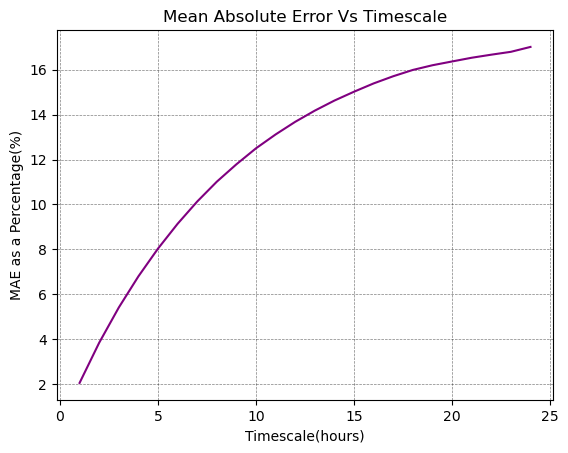

In [60]:
plt.plot(n_values, mae_percent,color='Purple');
plt.xlabel('Timescale(hours)');
plt.ylabel('MAE as a Percentage(%)');
plt.title('Mean Absolute Error Vs Timescale');
plt.grid(color='black', alpha=0.5, linestyle='dashed', linewidth=0.5);
plt.savefig("MaeVstimescale_2.png");

## Task 10

The task is to find the best ARIMA model by using information criterion (AIC and BIC) looping over the number of parameters to include in an ARIMA model for describing wind generation.


#### i. Declaration of parameters to be used 

In [61]:
# Declaration of parameters to be used 
p_values = []
q_values = []
d=1
p = np.arange(1, 5)
value = 0
while value < len(p):
    number = p[value]
    p_values.append(number)
    q_values.append(number)
    value += 1

#### ii. Inserting declared parameters into an ARIMA model

In [62]:
# Calculation of the AIC and BIC from an ARIMA model
AIC_values = []
BIC_values = []
turple=[]
i = 0
while i < len(p_values):
    value = p_values[i]
    for number in q_values:
        orders=(value,d,number)
        model = arima_model.ARIMA(wind_gen['Wind Generation'], order=(value, d, number))
        model_fit = model.fit()
        AIC = model_fit.aic
        BIC = model_fit.bic
        AIC_values.append(AIC)
        BIC_values.append(BIC)
        turple.append(orders) 
    i += 1 

#### iii. Optimal ARIMA model parameters 

In [63]:
print("The minimum AIC value is",min(AIC_values),"From parameters",turple[AIC_values.index(min(AIC_values))])
print("The minimum BIC value is",min(BIC_values),"from parameters",turple[BIC_values.index(min(BIC_values))])

The minimum AIC value is 98781.65364790363 From parameters (3, 1, 1)
The minimum BIC value is 98817.04283301445 from parameters (3, 1, 1)
